In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.optimizers.legacy import RMSprop
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Sequential Models for Document Classification

In [3]:
MAX_FEATURES = 10000
INDEX_FROM = 3
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=MAX_FEATURES, index_from=INDEX_FROM)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
wc = np.array([len(x) for x in X_train])

median = np.median(wc)
print(median)

result = np.sum(wc <= 500) / len(wc)
print(result)

178.0
0.91568


We see that over 91% of the documents have fewer than 500 words. Our RNN requires all the document sequences to have the same length. We hence restrict the document lengths to the last $L=500$, and pad the beginning of the shorter ones with blanks.

In [7]:
maxlen = 500
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [8]:
X_train.shape, X_test.shape

((25000, 500), (25000, 500))

In [10]:
X_train[0, 489:500]

array([  16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,   32],
      dtype=int32)

The last expression shows the last few words in the first document. At this stage, each of the 500 words in the document is represented using an integer corresponding to the location of that word in the 10,000-word dictionary. The first layer of the RNN is an embedding layer of size 32, which will be learned during training. This layer one-hot encodes each document as a matrix of dimension $500 × 10,000$, and then maps these 10, 000 dimensions down to 32.


In [13]:
model = Sequential(
    [
        Embedding(input_dim=10000, output_dim=32),
        LSTM(units=32),
        Dense(units=1, activation='sigmoid')
    ]
)

model.compile(
    loss=BinaryCrossentropy(),
    optimizer=RMSprop(),
    metrics = ['acc']
)

In [14]:
history = model.fit(X_train, y_train, epochs=10,
                    batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
196/196 [==============================] - 106s 528ms/step - loss: 0.4872 - acc: 0.7707 - val_loss: 0.3056 - val_acc: 0.8754
Epoch 2/10
196/196 [==============================] - 114s 584ms/step - loss: 0.2798 - acc: 0.8898 - val_loss: 0.3449 - val_acc: 0.8583
Epoch 3/10
196/196 [==============================] - 112s 574ms/step - loss: 0.2310 - acc: 0.9122 - val_loss: 0.3936 - val_acc: 0.8663
Epoch 4/10
196/196 [==============================] - 113s 576ms/step - loss: 0.2040 - acc: 0.9246 - val_loss: 0.2955 - val_acc: 0.8804
Epoch 5/10
196/196 [==============================] - 115s 588ms/step - loss: 0.1792 - acc: 0.9341 - val_loss: 0.3192 - val_acc: 0.8703
Epoch 6/10
196/196 [==============================] - 113s 580ms/step - loss: 0.1608 - acc: 0.9423 - val_loss: 0.5762 - val_acc: 0.8295
Epoch 7/10
196/196 [==============================] - 93s 477ms/step - loss: 0.1518 - acc: 0.9458 - val_loss: 0.3183 - val_acc: 0.8742
Epoch 8/10
196/196 [=============================

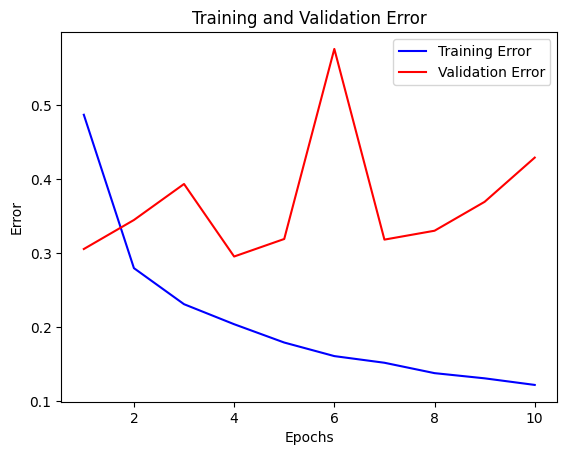

In [15]:
# Plotting Training Error and Validation Error on each epoch
train_errors = history.history['loss']
val_errors = history.history['val_loss']

epochs = np.arange(1, len(train_errors)+1)
plt.plot(epochs, train_errors, 'b-', label='Training Error')
plt.plot(epochs, val_errors, 'r-', label='Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training and Validation Error')
plt.legend()
plt.show()

In [16]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 42s 54ms/step - loss: 0.4292 - acc: 0.8617


[0.42923280596733093, 0.8617200255393982]

### Time Series Prediction

Unfortunately, I was unable to access the NYSE dataset used in the time series prediction section of the ISLR book.